In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
path="incident_event_log.csv"

In [506]:
# Import the Dataset
dataset = pd.read_csv(path)

In [507]:
dataset.shape

(141712, 36)

In [508]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/02/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,01/03/2016 09:52,06/03/2016 10:00


In [509]:
dataset.info()
#missing percentage
dataset.isnull().sum() * 100 / len(dataset)
#Ok there are no null entry.
#but have many '?'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

number                     0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_created_by             0.0
sys_created_at             0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
cmdb_ci                    0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
problem_id                 0.0
rfc                        0.0
vendor                     0.0
caused_by                  0.0
closed_c

In [510]:
#set all '?' entry as null and reread
missing_values = ['?']
dataset = pd.read_csv(path, na_values = missing_values)
print(dataset.isnull().values.sum())

C:\Users\jingr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


894597


In [511]:
dataset.isnull().sum() * 100 / len(dataset)
# the "cmdb_ci","problem_id","rfc","vendor","caused_by" columns don't have enough non-null values.  
# So, we delete these columns.

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

In [512]:
dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"], inplace=True, axis=1)

In [513]:
#dataset.isnull().sum() * 100 / len(dataset)

In [514]:
def print_unique():
    for mstr in dataset:
        print(mstr+":")
        print(dataset[mstr].unique()[0:10])
        print(f"category number = {len(dataset[mstr].unique())}")
#print_unique()



In [515]:
#then we covert the time column to datetime type
import datetime
#datetime.datetime.strptime("29/02/2016 15:51",'%d/%m/%Y %H:%M')
date_list=["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at"]
for mstr in date_list:
    dataset[mstr]=dataset[mstr].apply(lambda x:datetime.datetime.strptime(x,'%d/%m/%Y %H:%M')if type(x) is str else np.NaN)
#unexpectedly, it work

In [516]:
print_unique()


number:
['INC0000045' 'INC0000047' 'INC0000057' 'INC0000060' 'INC0000062'
 'INC0000063' 'INC0000064' 'INC0000065' 'INC0000066' 'INC0000067']
category number = 24918
incident_state:
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence' '-100']
category number = 9
active:
[ True False]
category number = 2
reassignment_count:
[0 1 2 3 4 5 6 7 8 9]
category number = 28
reopen_count:
[0 1 2 3 4 5 6 7 8]
category number = 9
sys_mod_count:
[0 2 3 4 1 5 6 7 8 9]
category number = 115
made_sla:
[ True False]
category number = 2
caller_id:
['Caller 2403' 'Caller 4416' 'Caller 4491' 'Caller 3765' 'Caller 2146'
 'Caller 2838' 'Caller 5323' 'Caller 3796' 'Caller 442' 'Caller 3757']
category number = 5245
opened_by:
['Opened by  8' 'Opened by  397' 'Opened by  180' 'Opened by  131'
 'Opened by  24' 'Opened by  40' 'Opened by  433' 'Opened by  62'
 'Opened by  501' 'Opened by  301']
category number = 208
opened_at:
['2016-02-29T01:16:00.000

In [517]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null datetime64[ns]
sys_created_by             88636 non-null object
sys_created_at             88636 non-null datetime64[ns]
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory             

In [518]:
#delete prefix
#unnecessary
import re
delete_prefix_list=["caller_id","opened_by","sys_created_by","sys_updated_by",
                 "location","category","subcategory","u_symptom","assignment_group",
                 "assigned_to","closed_code","resolved_by"]
c = re.compile(r'(.*?)([0-9]*)($)')
for mstr in delete_prefix_list:
    #dataset[mstr]=dataset[mstr].apply(lambda x:c.match(str(x)).group(2))
    pass

In [519]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null datetime64[ns]
sys_created_by             88636 non-null object
sys_created_at             88636 non-null datetime64[ns]
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory             

In [520]:
dataset.describe()


,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


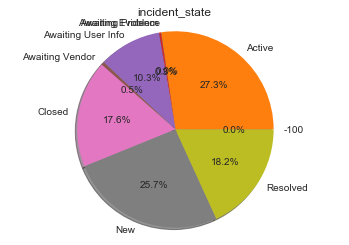

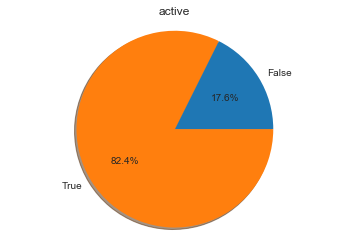

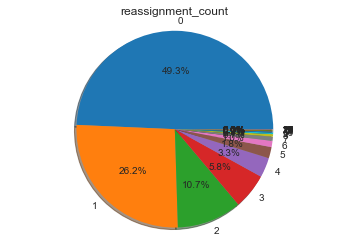

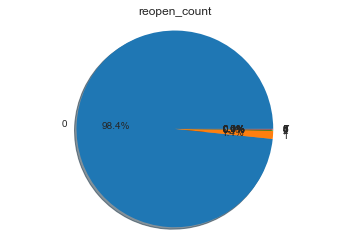

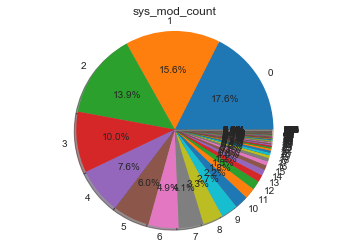

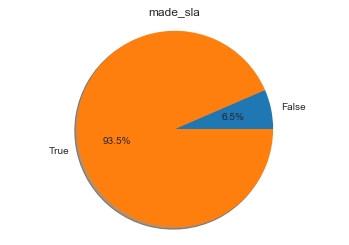

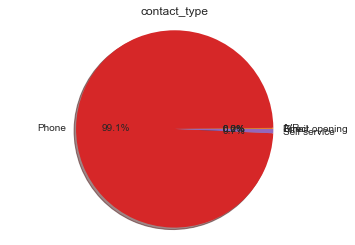

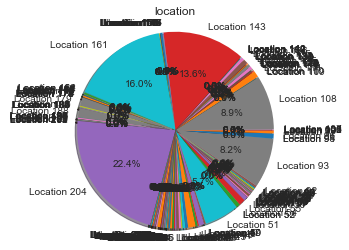

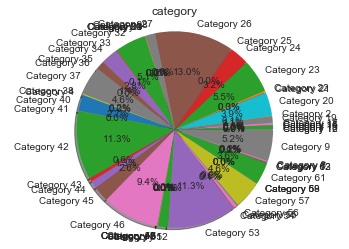

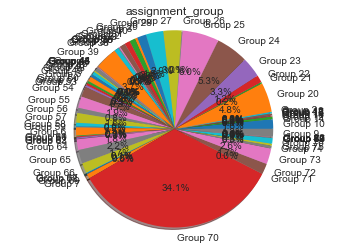

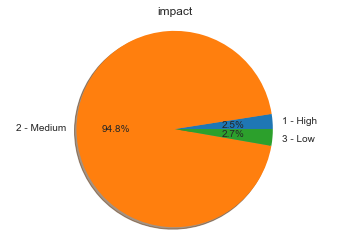

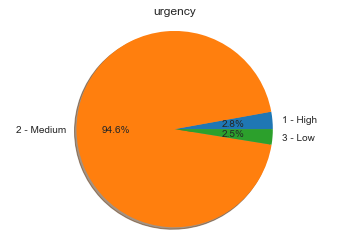

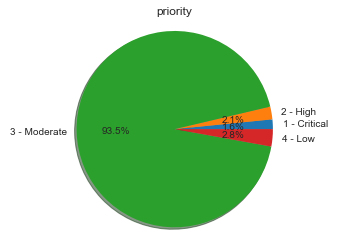

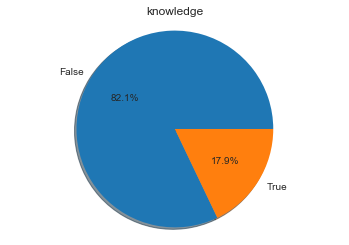

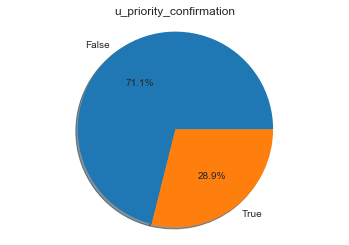

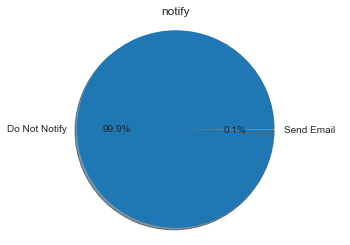

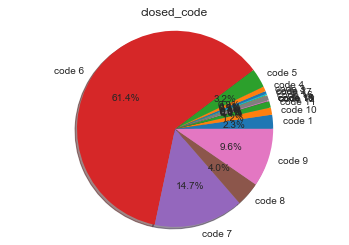

In [521]:
#draw pie barplot
import matplotlib.pyplot as plt
draw_polt=['incident_state','active','reassignment_count',
           'reopen_count','sys_mod_count','made_sla',
           'contact_type','location','category','assignment_group','impact','urgency','priority',
           'knowledge','u_priority_confirmation','notify','closed_code']
for mstr in draw_polt:
    labels = dataset[mstr].astype('category').cat.categories.tolist()
    counts = dataset[mstr].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.title(mstr)
    plt.show()

In [522]:
#draw time series density graph
# for mstr in date_list:
#     s=dataset[mstr]
#     s2=pd.Series(s.index.values, index=s ).resample('W').count()
#     s3=s2.to_frame()
#     s3.plot()
#     plt.show()

In [523]:
#delete the row which data is incomplete 
record=[]
for index, row in dataset.iterrows():
    if row.count()<31:
        record.append(index)
dataset=dataset.drop(record)

In [524]:
dataset.isnull().sum() * 100 / len(dataset)
#now, all row is complete



number                     0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_created_by             0.0
sys_created_at             0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
closed_code                0.0
resolved_by                0.0
resolved_at                0.0
closed_at                  0.0
dtype: float64

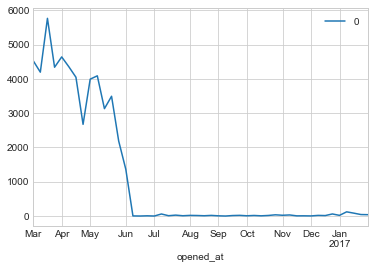

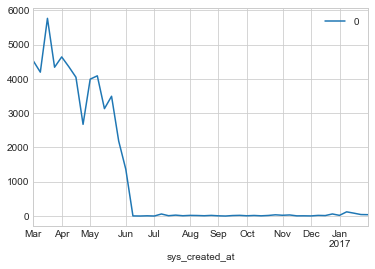

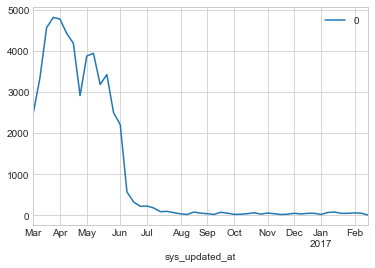

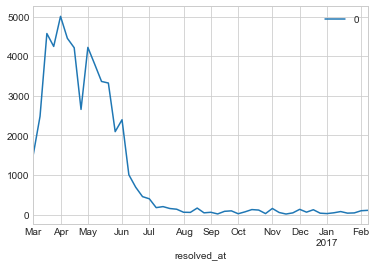

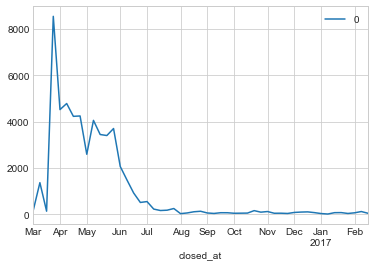

In [525]:
#time series graph after cleaning
for mstr in date_list:
    s=dataset[mstr]
    s2=pd.Series(s.index.values, index=s).resample('W').count()
    s3=s2.to_frame()
    s3.plot()
    plt.show()

In [526]:
for mstr in date_list:
    s=dataset[mstr]
    s2=pd.Series(s.index.values, index=s).resample('M').count()
    s3=s2.to_frame()
    print(s2)

opened_at
2016-02-29      546
2016-03-31    21798
2016-04-30    16089
2016-05-31    14412
2016-06-30        9
2016-07-31      102
2016-08-31       65
2016-09-30       40
2016-10-31       73
2016-11-30       64
2016-12-31      105
2017-01-31      296
Freq: M, dtype: int64
sys_created_at
2016-02-29      546
2016-03-31    21798
2016-04-30    16089
2016-05-31    14408
2016-06-30       13
2016-07-31      102
2016-08-31       65
2016-09-30       40
2016-10-31       73
2016-11-30       64
2016-12-31      105
2017-01-31      296
Freq: M, dtype: int64
sys_updated_at
2016-02-29      182
2016-03-31    18482
2016-04-30    16546
2016-05-31    14522
2016-06-30     2183
2016-07-31      459
2016-08-31      201
2016-09-30      188
2016-10-31      167
2016-11-30      158
2016-12-31      156
2017-01-31      267
2017-02-28       88
Freq: M, dtype: int64
resolved_at
2016-02-29       34
2016-03-31    16663
2016-04-30    16620
2016-05-31    13926
2016-06-30     3651
2016-07-31      681
2016-08-31      363
20

In [527]:
#reset index
dataset = dataset.reset_index(drop=True)

Well, after checking and analyzing all data  
I consider only the incident solved time(time cost) is valuable to predict.  
All others are either impossible to predict or meaningless to predict.

In [529]:
#So, firstly I calculated the incident solve time
dataset["solve_time"]=dataset["resolved_at"]-dataset["opened_at"]
dataset["solve_time"].head()

0   1 days 05:12:00
1   1 days 05:12:00
2   1 days 05:12:00
3   1 days 05:12:00
4   1 days 05:12:00
Name: solve_time, dtype: timedelta64[ns]

List the learned predicted meachine learning model:
    * Decision Tree/Random Forest
    * KNN
    * Bayes' Classifier
    * Linear/Logistic Regression with Gradient Descent
    * Item-CF
    
As we hope to predict a continuous variable, but the given feature are mostly categorical(In practical concept)
I consider only the linear regression and KNN can be used in that case



In [530]:
drop_column=["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at","number"]
dataset=dataset.drop(drop_column, axis=1)

In [531]:
#before doing linear regression
#use one-hot encoding to convert date to satisfy the linear_model
import pandas as pd
from sklearn import preprocessing
try:
    dataset_linear_regression=dataset.copy()
    catColumns = dataset_linear_regression.select_dtypes(['object']).columns
    le = preprocessing.LabelEncoder()
    for col in catColumns:
        n = len(dataset_linear_regression[col].unique())
        if (n > 2):
           X = pd.get_dummies(dataset_linear_regression[col])
           #X = X.drop(X.columns[0], axis=1)
           dataset_linear_regression[X.columns] = X
           dataset_linear_regression.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
        else:
           le.fit(dataset_linear_regression[col])
           dataset_linear_regression[col] = le.transform(dataset_linear_regression[col])
except Exception as e:
    print(e)
    del dataset_linear_regression

Unable to allocate array with shape (53599, 3264) and data type uint8


In [532]:
#Well, the jupyter said the memory is not enough(because there are too much category)
#And even memory space is enough, it is bad to fit a regression model with some many columns
#so, I choose to drop the categorical features with categories more than cate=10 
cate=10
dataset_linear_regression=dataset.copy()
catColumns = dataset_linear_regression.select_dtypes(['object']).columns
le = preprocessing.LabelEncoder()
for col in catColumns:
    n = len(dataset_linear_regression[col].unique())
    if (n > 2):
        if(n < cate):
            X = pd.get_dummies(dataset_linear_regression[col])       
            #X = X.drop(X.columns[0], axis=1)
            dataset_linear_regression[col+" - "+X.columns] = X
        dataset_linear_regression.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
        le.fit(dataset_linear_regression[col])
        dataset_linear_regression[col] = le.transform(dataset_linear_regression[col])

In [533]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred,r=None):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    if r=='MSE':
        return round(mse,4)
    else:
        print('explained_variance: ', round(explained_variance,4))    
        #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
        print('r2: ', round(r2,4))
        print('MAE: ', round(mean_absolute_error,4))
        print('MSE: ', round(mse,4))
        print('RMSE: ', round(np.sqrt(mse),4))

In [553]:
#Linear regression
x_linear_regression = dataset_linear_regression.drop('solve_time', axis=1)
y = dataset_linear_regression['solve_time']/np.timedelta64(1, 'h')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_linear_regression, y, test_size=0.20)
from sklearn import linear_model
linreg = linear_model.LinearRegression()
reg=linreg.fit(x_train,y_train)
regression_results(y_test, reg.predict(x_test))
#comment: the LinearRegression does not have significant parameters to adjust

explained_variance:  0.5019
r2:  0.5019
MAE:  255.1543
MSE:  309519.2591
RMSE:  556.3446


In [554]:
#SGDRegressor
harvest=[]
i=-1
PENALTY=['none', 'l2', 'l1', 'elasticnet']
LOSS=['squared_loss', 'huber', 'epsilon_insensitive',  'squared_epsilon_insensitive']
for penalty in PENALTY:
    harvest.append([])
    i+=1
    for loss in LOSS:
        sgdreg=linear_model.SGDRegressor(penalty=penalty,loss=loss)
        reg2=sgdreg.fit(x_train,y_train)
        harvest[i].append(regression_results(y_test, reg2.predict(x_test),r="MSE"))

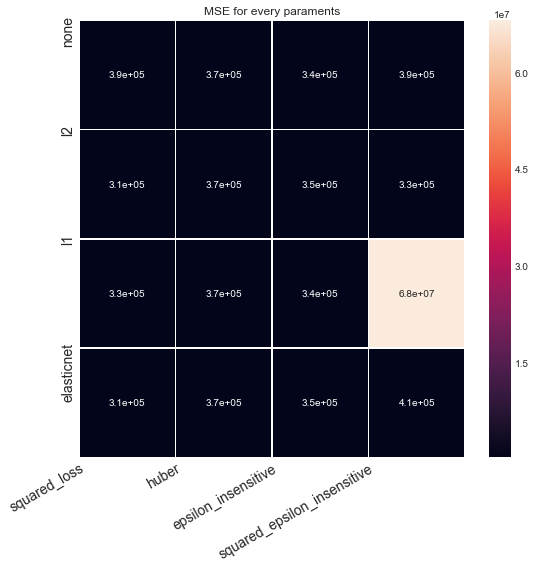

In [568]:
import seaborn as sns
harvest_np = np.array(harvest)
fig, ax = plt.subplots(figsize=(8,8))   

ax=sns.heatmap(harvest_np, annot=True,  linewidths=.5)
# We want to show all ticks...
ax.set_xticks(np.arange(len(LOSS)))
ax.set_yticks(np.arange(len(PENALTY)))
# ... and label them with the respective list entries
ax.set_xticklabels(LOSS, fontsize=14)
ax.set_yticklabels(PENALTY, fontsize=14)

#Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

ax.set_title("MSE for every paraments")
fig.tight_layout()
plt.show()

After some evaluating in parament, I found the hyperparament compose "penalty='l2',loss='squared_loss'" has the best performance(and it is the default parament).  
But overall the impact is not so significant, in general.  
And the final performance is also similar with normal linear regression  
I consider that may because all linear model would finally converge to a similar stable situation  
Besides, I consider maybe the dropped features still contain lots of information and we need to find a way to use these data

In [570]:
#So, let us try to use KNN model
dataset.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by',
       'sys_updated_by', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'impact', 'urgency', 'priority', 'assignment_group',
       'assigned_to', 'knowledge', 'u_priority_confirmation', 'notify',
       'closed_code', 'resolved_by', 'solve_time'],
      dtype='object')

In [571]:
knn_x = dataset.drop('solve_time', axis=1)

In [572]:
normalize_to=["reassignment_count","reopen_count","sys_mod_count"]

In [573]:
#normalize numeric data
for i in normalize_to:
    knn_x[i]=(knn_x[i]-knn_x[i].min())/(knn_x[i].max()-knn_x[i].min())

In [574]:
knn_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53599 entries, 0 to 53598
Data columns (total 25 columns):
incident_state             53599 non-null object
active                     53599 non-null bool
reassignment_count         53599 non-null float64
reopen_count               53599 non-null float64
sys_mod_count              53599 non-null float64
made_sla                   53599 non-null bool
caller_id                  53599 non-null object
opened_by                  53599 non-null object
sys_created_by             53599 non-null object
sys_updated_by             53599 non-null object
contact_type               53599 non-null object
location                   53599 non-null object
category                   53599 non-null object
subcategory                53599 non-null object
u_symptom                  53599 non-null object
impact                     53599 non-null object
urgency                    53599 non-null object
priority                   53599 non-null object
assignment

In [575]:
#similarity function
def similarity(a,b):
    l=len(a)
    sim=0
    for i in range(l):
        if type(a[i])is np.float64:
            sim+=a[i]==b[i]
        else:
            if a[i]==b[i]:
                sim+=1
    return sim/l

In [576]:
import time 
start = time.process_time()
#simdf = pd.DataFrame(columns=['no','sim','solve_time'])
list_of_sim = []
find_no=100
data_num=1000
for i in range(data_num):
    if i==find_no:continue
    list_of_sim.append([i,similarity(knn_x.iloc[find_no],knn_x.iloc[i]),y.iloc[i]])    
simdf=pd.DataFrame(list_of_sim, columns=['no','sim','solve_time'])
simdf=simdf.sort_values('sim',ascending =False)
elapse = (time.process_time() - start)
print(f"ergodic in {data_num} rows of data would cost {elapse} seconds")


ergodic in 1000 rows of data would cost 1.59375 seconds


In [612]:
simdf.head(knn_K)

,no,sim,solve_time
99,99,0.80,26.783333
98,98,0.76,26.783333
191,192,0.72,71.250000
97,97,0.68,26.783333
466,467,0.60,16.633333


In [577]:
knn_K=5
sum(simdf.head(knn_K)["solve_time"])/knn_K

33.64666666666666

In [578]:
#Well, I found KNN is a really slow method(as there are 25 features), and would take lots lots of time
#so I choose to only take 0.5% of all data as train set and test set
knn_percentage=0.005
_, x_test2, _, y_test2 = train_test_split(knn_x, y, test_size=knn_percentage)
_, x_train2, _, y_train2 = train_test_split(knn_x, y, test_size=knn_percentage)

In [579]:
def knn_predict(x_test,x_train,y_train,k=10):
    y=[]
    for i in range(x_test.shape[0]):
        if(i%100==0):print(f"{i}/{x_test.shape[0]}")
        list_of_sim = []
        for j in range(x_train.shape[0]):
            list_of_sim.append([similarity(x_test.iloc[i],x_train.iloc[j]),y_train.iloc[j]])
        simdf=pd.DataFrame(list_of_sim, columns=['sim','solve_time'])
        simdf=simdf.sort_values('sim',ascending =False)
        y.append(sum(simdf.head(k)["solve_time"])/k)
    y = pd.Series(y)
    return y

In [580]:
#running this cell would cost around 5 minutes
knn_predicted=knn_predict(x_test2,x_train2,y_train2)

0/268
100/268
200/268


In [581]:
regression_results(y_test2, knn_predicted)

explained_variance:  0.0808
r2:  0.0799
MAE:  362.9427
MSE:  531096.5982
RMSE:  728.7637


obviously, it is even far more worse than the linear regression  
Maybe knn is not suitable to using in there, may because the dimension is too high or some parament is actually more important than others but knn can't distinguish them.

but luckily, I found seems decision tree model in sklearn also can predict regression problem, let's have a try

In [582]:
#decision_tree
dataset_decision_tree=dataset.copy()
x_decision_tree = dataset_decision_tree.drop('solve_time', axis=1)
#label encoder
x_decision_tree=x_decision_tree.apply(preprocessing.LabelEncoder().fit_transform)
#y = dataset_decision_tree['solve_time']/np.timedelta64(1, 'h')
from sklearn import tree
clf = tree.DecisionTreeRegressor()
seed1=np.random.randint(65536)
seed2=np.random.randint(65536)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_decision_tree, y, test_size=0.2,random_state=seed1)
x_train3, x_validation3, y_train3, y_validation3 = train_test_split(x_train3, y_train3, test_size=0.2,random_state=seed2)
clf = clf.fit(x_train3, y_train3)
regression_results(y_test3,clf.predict(x_test3))
#well, the DecisionTreeRegressor get a much greater result, I consider it is because the classifier can use all features
#that means can use all information

explained_variance:  0.6375
r2:  0.6375
MAE:  138.363
MSE:  227899.8664
RMSE:  477.3886


In [598]:
#try to optimize the min_samples_leaf parament
index_list=[]
mse_list=[]
for i in range(1,11):
    clf = tree.DecisionTreeRegressor(min_samples_leaf=i)
    clf = clf.fit(x_train3, y_train3)
    index_list.append(i)
    mse_list.append(metrics.mean_squared_error(y_test3,clf.predict(x_test3)))

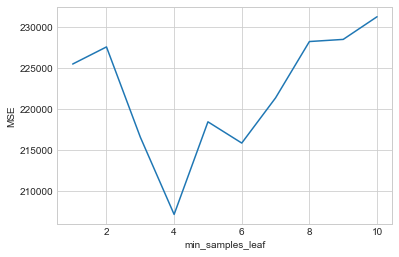

In [599]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='min_samples_leaf', ylabel='MSE')
ax.plot(index_list,mse_list);

#seems when the best performance happened in min_samples_leaf=4
leaf_=index_list[mse_list.index(min(mse_list))]

In [605]:
from sklearn import ensemble
index_list=[]
mse_list=[]
for e in range(5,26):
    #print(e)
    bag=ensemble.BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(min_samples_leaf=leaf_),max_samples=0.8,n_estimators=e,n_jobs=4)
    bag = bag.fit(x_train3, y_train3)
    bag_pre=bag.predict(x_test3)
    index_list.append(e)
    mse_list.append(regression_results(y_test3,bag_pre,r="MSE"))

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


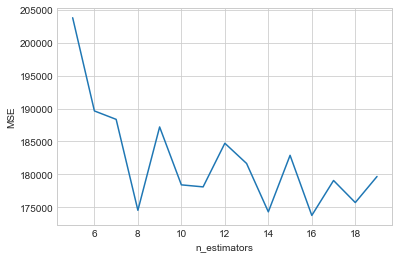

In [608]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='n_estimators', ylabel='MSE')
ax.plot(index_list,mse_list);

#find best n_estimators
n_estimators_=index_list[mse_list.index(min(mse_list))]

In [609]:
bag=ensemble.BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(min_samples_leaf=leaf_),max_samples=0.8,n_estimators=n_estimators_,n_jobs=4)
bag = bag.fit(x_train3, y_train3)
bag_pre=bag.predict(x_test3)
regression_results(y_test3,bag_pre)

explained_variance:  0.7198
r2:  0.7198
MAE:  169.7691
MSE:  176159.2326
RMSE:  419.7133


let us try to ensemble it with the linear model

As the two models used dataset are heterogeneous(from different preprossing)

So, I use same split seed to split each dataset

In [610]:
cate=10
dataset_linear_regression=dataset.copy()
catColumns = dataset_linear_regression.select_dtypes(['object']).columns
le = preprocessing.LabelEncoder()
for col in catColumns:
    n = len(dataset_linear_regression[col].unique())
    if (n > 2):
        if(n < cate):
            X = pd.get_dummies(dataset_linear_regression[col])       
            #X = X.drop(X.columns[0], axis=1)
            dataset_linear_regression[col+" - "+X.columns] = X
        dataset_linear_regression.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
        le.fit(dataset_linear_regression[col])
        dataset_linear_regression[col] = le.transform(dataset_linear_regression[col])
x_linear_regression = dataset_linear_regression.drop('solve_time', axis=1)
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_linear_regression, y, test_size=0.2,random_state=seed1)
x_train4, xvalidation4, y_train4, y_validation4 = train_test_split(x_train4, y_train4, test_size=0.2,random_state=seed2)
linreg = linear_model.LinearRegression()
reg=linreg.fit(x_train4,y_train4)
regression_results(y_test4,reg.predict(x_test4))

explained_variance:  0.489
r2:  0.489
MAE:  258.7053
MSE:  321205.4593
RMSE:  566.7499


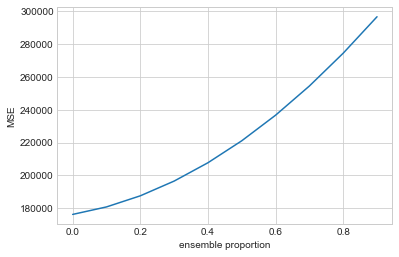

In [611]:
#ensemble
index_list=[]
mse_list=[]
clf_pre=clf.predict(x_test3)
reg_pre=reg.predict(x_test4)
for i in np.arange(0.0, 1.0, 0.1):
    index_list.append(i)
    mse_list.append(metrics.mean_squared_error(y_test3,reg.predict(x_test4)*i+bag.predict(x_test3)*(1-i)))
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.set(xlabel='ensemble proportion', ylabel='MSE')
ax.plot(index_list,mse_list);

ok, obviously the ensemble between the two model is useless, the more we used the prediction in linear regression, the higher MSE we got.  

So, the best prediction model we got is the DecisionTreeRegressor model with min_samples_leaf=4, plus bagging method with n_estimators=16

In [614]:
#let's do a final check whether there are overfitting
regression_results(y_test3,bag_pre)
regression_results(y_validation3,bag.predict(x_validation3))

explained_variance:  0.7198
r2:  0.7198
MAE:  169.7691
MSE:  176159.2326
RMSE:  419.7133
explained_variance:  0.7353
r2:  0.7352
MAE:  169.4412
MSE:  170174.7008
RMSE:  412.5224


These metric in validation set is similar with test set, that means there are no overfiting

Reference:   
[1]do Amaral, C. A., Fantinato, M., & Peres, S. M. (2018, September). Attribute selection with filter and wrapper: an application on incident management process. In 2018 Federated Conference on Computer Science and Information Systems (FedCSIS) (pp. 679-682). IEEE.